## The Sparks Foundation -  Data Science and Business Analytics Intern @TSF

### Graduate Rotational Internship Program (GRIP - August 2021)
### Task 5: Exploratory Data Analysis : Sports (Indian Premier League)
### Author:Tushar Singh

#### **Problem Statement:**

Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’, as a sports analysts, 
1. find out the most successful teams, players and factors contributing win or loss of a team 
2. suggest teams or players a company should endorse for its products.

**Dataset**: https://bit.ly/34SRn3b

**Exploratory Data Analysis** - is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. 
Here in our task we will Perform ‘Exploratory Data Analysis’ on dataset **‘Indian Premier League’.**

In [11]:
from google.colab import drive
drive.mount('/content/grive')

Drive already mounted at /content/grive; to attempt to forcibly remount, call drive.mount("/content/grive", force_remount=True).


### libraries used in project

In [12]:
#importing the required libraries
import os 
import csv
import json
import warnings
import numpy as np 
%matplotlib inline
import mpl_toolkits
import pandas as pd 
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt 
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
import plotly.graph_objects as go
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

### loading data sets

In [13]:
matches_df = pd.read_csv("/content/grive/MyDrive/Colab Notebooks/matches.csv")
deliveries_df = pd.read_csv("/content/grive/MyDrive/Colab Notebooks/deliveries.csv")

In [14]:
matches_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [15]:
deliveries_df

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN


### data information at a glance

In [16]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [17]:
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

### data description

In [18]:
matches_df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [19]:
deliveries_df.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


### data preprocessing 

In [20]:
matches_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [21]:
matches_df.tail()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [22]:
matches_df.nunique()

id                 756
season              12
city                32
date               546
team1               15
team2               15
toss_winner         15
toss_decision        2
result               3
dl_applied           2
winner              15
win_by_runs         89
win_by_wickets      11
player_of_match    226
venue               41
umpire1             61
umpire2             65
umpire3             25
dtype: int64

In [23]:
deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [24]:
deliveries_df.tail()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
179077,11415,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,0,0,0,SN Thakur,lbw,NaN


In [25]:
deliveries_df.nunique()

match_id            756
inning                5
batting_team         15
bowling_team         15
over                 20
ball                  9
batsman             516
non_striker         511
bowler              405
is_super_over         2
wide_runs             6
bye_runs              5
legbye_runs           6
noball_runs           5
penalty_runs          2
batsman_runs          8
extra_runs            7
total_runs           10
player_dismissed    487
dismissal_kind        9
fielder             499
dtype: int64

### checking is null values are present in datasets 

In [124]:
matches_df.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
umpire3            0
win_by             0
dtype: int64

> Null values are present in "matches.csv" dataset

In [125]:
deliveries_df.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

> Null values are present in "deliveries.csv" dataset

In [126]:
matches_df.columns.values

array(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'win_by'], dtype=object)

In [127]:
matches_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [128]:
matches_df['team2'].unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [129]:
deliveries_df['batting_team'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [130]:
deliveries_df['bowling_team'].unique()

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants', 'Delhi Capitals'], dtype=object)

In [131]:
#printing all the city hosted IPL matches
matches_df['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah',
       'Mohali', 'Bengaluru'], dtype=object)

In [132]:
print("City in which most matches have been won: ",matches_df['city'].value_counts().idxmax()) 
print("Team that has won most matches: ",matches_df['winner'].value_counts().idxmax()) 
print("Player who has been man of the match most times: ",matches_df['player_of_match'].value_counts().idxmax()) 
print("Most frequent Umpire 1: " ,matches_df['umpire1'].value_counts().idxmax())
print("Most frequent Umpire 2: " ,matches_df['umpire2'].value_counts().idxmax())

City in which most matches have been won:  Mumbai
Team that has won most matches:  Mumbai Indians
Player who has been man of the match most times:  CH Gayle
Most frequent Umpire 1:  HDPK Dharmasena
Most frequent Umpire 2:  C Shamshuddin


> We are going to replace the missing values with the above outputs for their respective columns. 
> Since most values are null in umpire 3 we will replace them by NA. 

In [133]:
matches_df['city'].fillna(value='Mumbai', inplace=True)
matches_df['winner'].fillna(value='Mumbai Indians', inplace=True)
matches_df['player_of_match'].fillna(value='CH Gayle', inplace=True)
matches_df['umpire1'].fillna(value='HDPK Dharmasena', inplace=True)
matches_df['umpire2'].fillna(value='C Shamshuddin', inplace=True)
matches_df['umpire3'].fillna(value='NA', inplace=True)

In [134]:
matches_df.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
umpire3            0
win_by             0
dtype: int64

In [135]:
matches_df.id.is_unique

True

In [136]:
matches_df.duplicated().sum()

0

> We do not have any duplicated values.x

In [137]:
print('Total Matches played:',matches_df.shape[0])

Total Matches played: 756


In [138]:
print('Total venues playes at:', matches_df['city'].nunique())
print('\nTotal umpires:', matches_df['umpire1'].nunique())

Total venues playes at: 32

Total umpires: 61


In [139]:
matches_df["umpire3"].tail(10)

746              Nanda Kishore
747      KN Ananthapadmanabhan
748                Nitin Menon
749               Ulhas Gandhe
750             Bruce Oxenford
751                     S Ravi
752                  Ian Gould
753                         NA
754    Chettithody Shamshuddin
755                Nigel Llong
Name: umpire3, dtype: object

In [140]:
matches_df["umpire3"].isnull().sum()

0

In [141]:
# Matches we have got in the dataset 
matches_df['id'].max()

11415

In [142]:
# Seasons we have got in the dataset
matches_df['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019])

### team won by Maximum Runs

In [151]:
matches_df.iloc[matches_df['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                          NA
win_by                    Bat first
Name: 43, dtype: object

In [152]:
matches_df['winner'].value_counts().idxmax()

'Mumbai Indians'

In [153]:
matches_df['winner'].value_counts().idxmin()

'Rising Pune Supergiants'

In [154]:
matches_df.iloc[matches_df['win_by_runs'].idxmax()]['winner']

'Mumbai Indians'

### team won by Maximum Wickets

In [155]:
matches_df.iloc[matches_df['win_by_wickets'].idxmax()]

id                                                      3
season                                               2017
city                                               Rajkot
date                                           2017-04-07
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
umpire3       

In [156]:
matches_df.iloc[matches_df['win_by_wickets'].idxmax()]['winner']

'Kolkata Knight Riders'

### team won by minimum runs

In [208]:
matches_df.iloc[matches_df[matches_df['win_by_runs'].ge(1)].win_by_runs.idxmin()]

id                                                        59
season                                                  2017
city                                               Hyderabad
date                                              2017-05-21
team1                                         Mumbai Indians
team2                                 Rising Pune Supergiant
toss_winner                                   Mumbai Indians
toss_decision                                            bat
result                                                normal
dl_applied                                                 0
winner                                        Mumbai Indians
win_by_runs                                                1
win_by_wickets                                             0
player_of_match                                    KH Pandya
venue              Rajiv Gandhi International Stadium, Uppal
umpire1                                             NJ Llong
umpire2                 

In [209]:
matches_df.iloc[matches_df[matches_df['win_by_runs'].ge(1)].win_by_runs.idxmin()]['winner']

'Mumbai Indians'

### team won by Minimum Wickets

In [206]:
matches_df.iloc[matches_df[matches_df['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]

id                                   560
season                              2015
city                             Kolkata
date                          2015-05-09
team1                    Kings XI Punjab
team2              Kolkata Knight Riders
toss_winner              Kings XI Punjab
toss_decision                        bat
result                            normal
dl_applied                             0
winner             Kolkata Knight Riders
win_by_runs                            0
win_by_wickets                         1
player_of_match               AD Russell
venue                       Eden Gardens
umpire1                     AK Chaudhary
umpire2                  HDPK Dharmasena
umpire3                               NA
win_by                        Bowl first
Name: 559, dtype: object

In [207]:
matches_df.iloc[matches_df[matches_df['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]['winner']

'Kolkata Knight Riders'

### observation : 

> 1. **Mumbai Indians** is the team which won by maximum and minimum **runs**
> 2. **Kolkata Knight Riders** is the team which won by maximum and minimum **wickets** 

### team with most number of Wins per season

In [204]:
teams = matches_df.groupby('season')['winner'].value_counts()
teams

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

In [205]:
# will print no. of match won by each team in 2019
year = 2019
win_per_season_data = pd.DataFrame(columns=['year', 'team', 'wins'])
for items in teams.iteritems():    
    if items[0][0]==year:
        print(items)
        win_series = pd.DataFrame({
            'year': [items[0][0]],
            'team': [items[0][1]],
            'wins': [items[1]]
        })
        win_per_season_data = win_per_season_data.append(win_series)

((2019, 'Mumbai Indians'), 12)
((2019, 'Chennai Super Kings'), 10)
((2019, 'Delhi Capitals'), 10)
((2019, 'Kings XI Punjab'), 6)
((2019, 'Kolkata Knight Riders'), 6)
((2019, 'Sunrisers Hyderabad'), 6)
((2019, 'Rajasthan Royals'), 5)
((2019, 'Royal Challengers Bangalore'), 5)


### merging both the data sets

In [199]:
matches_df['win_by'] = np.where(matches_df['win_by_runs']>0,'Bat first','Bowl first')

In [200]:
data_season = matches_df[['id','season','winner']]
data_complete = deliveries_df.merge(data_season, how ='inner', left_on = 'match_id',right_on = 'id')

In [201]:
merge = pd.merge(deliveries_df , matches_df, left_on='match_id', right_on ='id')

In [202]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179078 entries, 0 to 179077
Data columns (total 40 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [203]:
merge.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,id,season,dl_applied,win_by_runs,win_by_wickets
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897,1802.252957,2013.444510,0.017914,13.404036,3.261579
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422,3472.322805,3.363947,0.132639,23.261007,3.347033
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,190.000000,2011.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,379.000000,2013.000000,0.000000,0.000000,3.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,567.000000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000,11415.000000,2019.000000,1.000000,146.000000,10.000000


### observations
- Bengaluru and Bangalore both are in the data when they are same. So we need to keep one of them
- Chandigarh and Mohali are same and there is just one stadium Punjab Cricket Association IS Bindra Stadium, Mohali whose value has not been entered correctly. We need to have either Chandigarh or Mohali as well as correct name of the stadium there
- Mumbai has 3 stadiums/venues used for IPL
- Pune has 2 venues for IPL<br>

### counts number of matches per season

In [157]:
style1  = {'family': 'Times New Roman', 'color': 'Tomato', 'size': 25}
style2  = {'family': 'Times New Roman', 'color': 'DodgerBlue', 'size': 20}

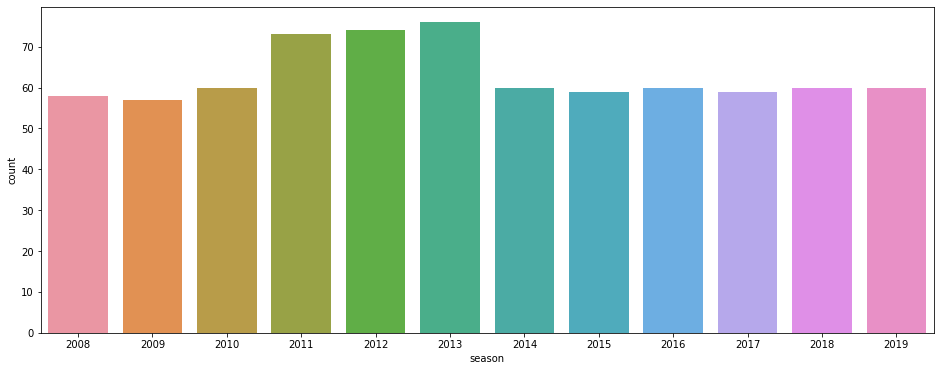

In [158]:
plt.figure(figsize = (16,6))
sns.countplot(x = 'season', data = matches_df)

### number of wins per team

In [159]:
team_wins_ser = matches_df['winner'].value_counts()

team_wins_data = pd.DataFrame(columns=["team", "wins"])
for items in team_wins_ser.iteritems():
    temp_data1 = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    team_wins_data = team_wins_data.append(temp_data1, ignore_index=True)
team_wins_data

,team,wins
0,Mumbai Indians,113
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Rajasthan Royals,75
6,Delhi Daredevils,67
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Gujarat Lions,13


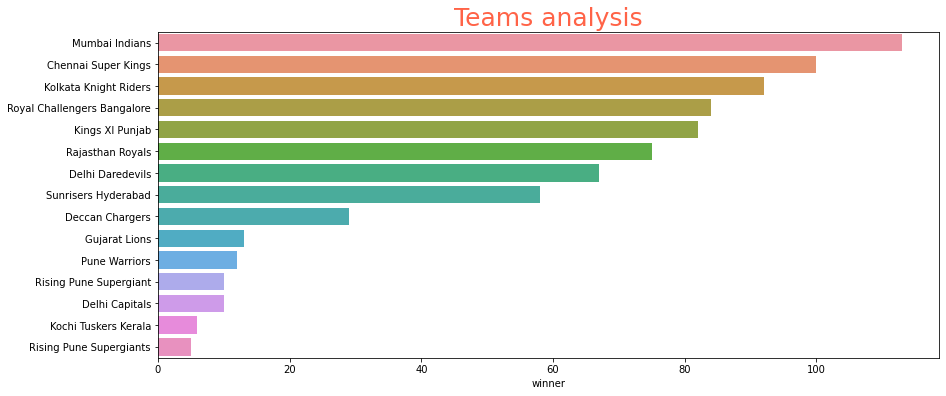

In [160]:
plt.figure(figsize=(14,6))
data = matches_df.winner.value_counts()
sns.barplot(y = data.index, x = data, orient='h')
plt.title('Teams analysis', fontdict=style1 )
plt.show()

> **MI** again leads the pack followed by CSK.

### finding top players

Text(0.5, 1.0, 'Top Players in the IPL (Players with most Man of the Match Award)')

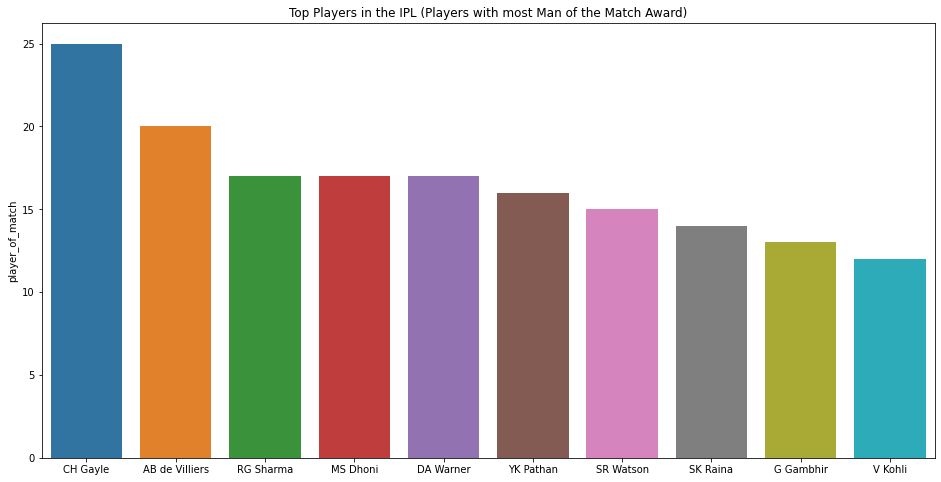

In [161]:
plt.figure(figsize = (16,8))
x = matches_df.player_of_match.value_counts()[:10].index
y = matches_df.player_of_match.value_counts()[:10]
sns.barplot(x, y).set_title("Top Players in the IPL (Players with most Man of the Match Award)")

> **CH Gayle** is the top player of the match awardee in all the seasons of IPL.

### player of the season

In [210]:
#plotting the players got player of the season
player_of_season = pd.DataFrame([(year, matches_df[matches_df['season']==year]['player_of_match'].value_counts().index[0], matches_df[matches_df['season']==year]['player_of_match'].value_counts()[0]) for year in range(2008, 2020)])
player_of_season.columns = ['season', 'player', 'count']

player_of_season
fig = px.bar(player_of_season, x="player", y="count", text=player_of_season['season'], color='player', title="Player of the Season | 2008-2019")
fig.update_xaxes(tickangle=90)
fig.show()

### champions each season

- Now let us see the champions in each season.

In [162]:
final_winner = matches_df.drop_duplicates(subset = ['season'], keep = 'last')
final_winner[['season', 'winner']].reset_index(drop = True).sort_values('season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


### city wise Winning

In [211]:
final_winner.groupby(['city','winner']).size()

city          winner               
Bangalore     Kolkata Knight Riders    1
              Sunrisers Hyderabad      1
Chennai       Chennai Super Kings      1
              Kolkata Knight Riders    1
Hyderabad     Mumbai Indians           2
Johannesburg  Deccan Chargers          1
Kolkata       Mumbai Indians           2
Mumbai        Chennai Super Kings      2
              Rajasthan Royals         1
dtype: int64

### season's won by teams

In [163]:
final_winner['winner'].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Deccan Chargers          1
Rajasthan Royals         1
Sunrisers Hyderabad      1
Name: winner, dtype: int64

In [164]:
# we will print toss winner, toss decision, winner in final matches.
final_winner[['toss_winner', 'toss_decision', 'winner']].reset_index(drop = True)

,toss_winner,toss_decision,winner
0,Mumbai Indians,bat,Mumbai Indians
1,Rajasthan Royals,field,Rajasthan Royals
2,Royal Challengers Bangalore,field,Deccan Chargers
3,Chennai Super Kings,bat,Chennai Super Kings
4,Chennai Super Kings,bat,Chennai Super Kings
5,Chennai Super Kings,bat,Kolkata Knight Riders
6,Mumbai Indians,bat,Mumbai Indians
7,Kolkata Knight Riders,field,Kolkata Knight Riders
8,Chennai Super Kings,field,Mumbai Indians
9,Sunrisers Hyderabad,bat,Sunrisers Hyderabad


In [165]:
# we will print man of the match in final matches
final_winner[['winner','player_of_match']].reset_index(drop=True)

,winner,player_of_match
0,Mumbai Indians,KH Pandya
1,Rajasthan Royals,YK Pathan
2,Deccan Chargers,A Kumble
3,Chennai Super Kings,SK Raina
4,Chennai Super Kings,M Vijay
5,Kolkata Knight Riders,MS Bisla
6,Mumbai Indians,KA Pollard
7,Kolkata Knight Riders,MK Pandey
8,Mumbai Indians,RG Sharma
9,Sunrisers Hyderabad,BCJ Cutting


In [166]:
# we will print no of matches played by batsman
No_Matches_player= deliveries_df[["match_id","player_dismissed"]]
No_Matches_player =No_Matches_player .groupby("player_dismissed")["match_id"].count().reset_index().sort_values(by="match_id",ascending=False).reset_index(drop=True)
No_Matches_player.columns=["batsman","No_of Matches"]
No_Matches_player .head(10)

,batsman,No_of Matches
0,SK Raina,162
1,RG Sharma,155
2,RV Uthappa,153
3,V Kohli,143
4,S Dhawan,137
5,G Gambhir,136
6,KD Karthik,135
7,PA Patel,126
8,AM Rahane,116
9,AT Rayudu,115


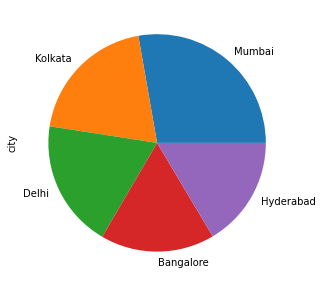

In [167]:
plt.subplots(figsize=(5,5))
matches_df['city'].value_counts().head().plot.pie()

In [168]:
deliveries_df['is_super_over'].value_counts()

0    178997
1        81
Name: is_super_over, dtype: int64

In [169]:
sum(deliveries_df['extra_runs'])

12004

In [170]:
sum(deliveries_df['noball_runs'])

749

In [171]:
sum(deliveries_df['penalty_runs'])

10

In [172]:
sum(deliveries_df['player_dismissed'].value_counts())

8834

### counting numbers of fours and sixs team wise and player Wise

In [212]:
# Counting fours team wise
four_data = data_complete[data_complete['batsman_runs'] == 4]
four_data.groupby('batting_team')['batsman_runs'].agg([('runs by fours','sum'),('four', 'count')])

,runs by fours,four
batting_team,,
Chennai Super Kings,8772,2193
Deccan Chargers,3828,957
Delhi Capitals,968,242
Delhi Daredevils,8632,2158
Gujarat Lions,1840,460
Kings XI Punjab,9832,2458
Kochi Tuskers Kerala,680,170
Kolkata Knight Riders,9736,2434
Mumbai Indians,10352,2588


In [213]:
# we will print no of sixes hit by team
six_data=data_complete[data_complete['batsman_runs']==6]
six_data.groupby('batting_team')['batsman_runs'].agg([('runs by six','sum'),('sixes','count')])

,runs by six,sixes
batting_team,,
Chennai Super Kings,5838,973
Deccan Chargers,2400,400
Delhi Capitals,522,87
Delhi Daredevils,4806,801
Gujarat Lions,930,155
Kings XI Punjab,5856,976
Kochi Tuskers Kerala,318,53
Kolkata Knight Riders,5580,930
Mumbai Indians,6576,1096


Text(0.5, 1.0, 'Number of fours hit by players')

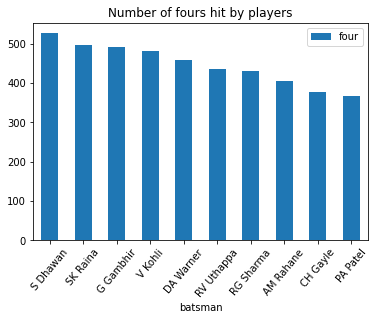

In [214]:
# Counting four Player wise
x = four_data.groupby('batsman')['batsman_runs'].agg([('four','count')]).reset_index().sort_values('four', ascending = 0)
x.iloc[:10,:].plot('batsman','four', kind = 'bar')
plt.xticks(rotation=50, size=10)
plt.title('Number of fours hit by players')

Text(0.5, 1.0, 'Number of fours hit in seasons')

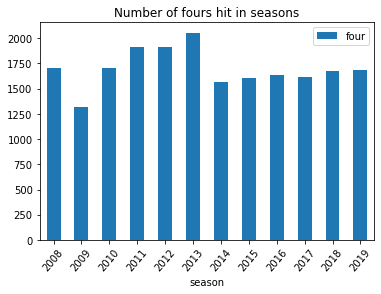

In [215]:
# Counting fours in seasons
x = four_data.groupby('season')['batsman_runs'].agg([('four','count')]).reset_index().plot('season', 'four', kind = 'bar')
plt.xticks(rotation=50, size=10)
plt.title('Number of fours hit in seasons')

In [216]:
# Counting Sixes hit by teams
six_data = data_complete[data_complete['batsman_runs'] == 6]
six_data.groupby('batting_team')['batsman_runs'].agg([('run by six', 'sum'), ('sixes','count')])

,run by six,sixes
batting_team,,
Chennai Super Kings,5838,973
Deccan Chargers,2400,400
Delhi Capitals,522,87
Delhi Daredevils,4806,801
Gujarat Lions,930,155
Kings XI Punjab,5856,976
Kochi Tuskers Kerala,318,53
Kolkata Knight Riders,5580,930
Mumbai Indians,6576,1096


Text(0.5, 1.0, 'Number of six hit by players')

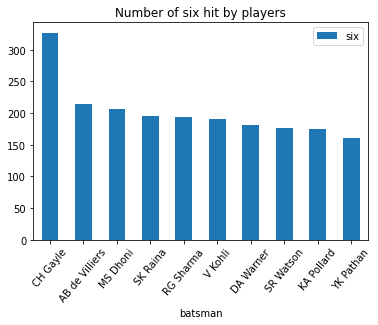

In [217]:
# Counting six hit by players
x = six_data.groupby('batsman')['batsman_runs'].agg([('six', 'count')]).reset_index().sort_values('six', ascending = 0)
x.iloc[:10,:].plot('batsman','six', kind = 'bar')
plt.xticks(rotation=50, size=10)
plt.title('Number of six hit by players')

Text(0.5, 1.0, 'Number of six hit is each season')

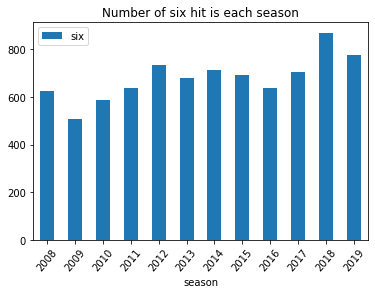

In [218]:
# Counting six hit by in seasons
x = six_data.groupby('season')['batsman_runs'].agg([('six','count')]).reset_index().plot('season','six', kind = 'bar')
plt.xticks(rotation=50, size=10)
plt.title('Number of six hit is each season')

### batsmen who played most no. of dot balls

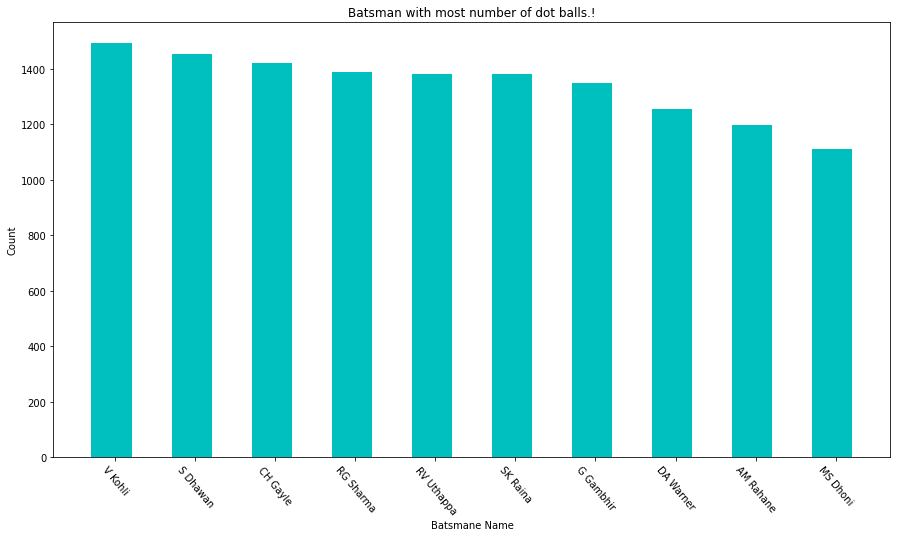

In [87]:
# Now let us see the batsman who has played the most number of dot balls.
temp_df = deliveries_df.groupby('batsman')['batsman_runs'].agg(lambda x: (x==0).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]
labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.5
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='c')
ax.set_xticks(ind+((width)/12.))
ax.set_xticklabels(labels, rotation=-50)
ax.set_ylabel("Count")
ax.set_title("Batsman with most number of dot balls.!")
ax.set_xlabel('Batsmane Name')
plt.show()

>It is interesting to see that the same names repeat again here as well. I think since these guys have played more number of balls, they have more dot balls as well.

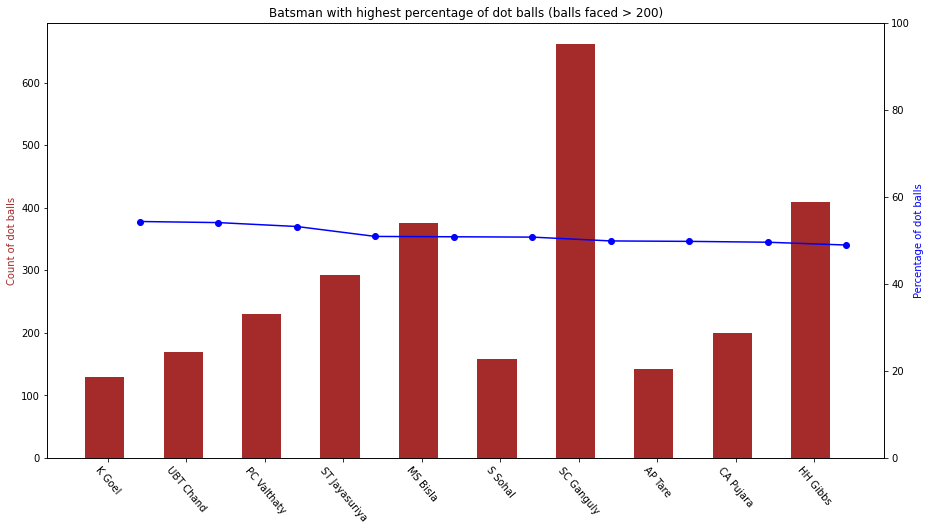

In [88]:
# Let us check the percentage distribution now.
def balls_faced(x):
    return len(x)

def dot_balls(x):
    return (x==0).sum()

temp_df = deliveries_df.groupby('batsman')['batsman_runs'].agg([balls_faced, dot_balls]).reset_index()
temp_df = temp_df.loc[temp_df.balls_faced>200,:]
temp_df['percentage_of_dot_balls'] = (temp_df['dot_balls'] / temp_df['balls_faced'])*100.
temp_df = temp_df.sort_values(by='percentage_of_dot_balls', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

fig, ax1 = plt.subplots(figsize=(15,8))
ax2 = ax1.twinx()
labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.5
rects = ax1.bar(ind, np.array(temp_df['dot_balls']), width=width, color='brown')
ax1.set_xticks(ind+((width)/12.))
ax1.set_xticklabels(labels, rotation=-50)
ax1.set_ylabel("Count of dot balls", color='brown')
ax1.set_title("Batsman with highest percentage of dot balls (balls faced > 200)")
ax2.plot(ind+0.45, np.array(temp_df['percentage_of_dot_balls']), color='b', marker='o')
ax2.set_ylabel("Percentage of dot balls", color='b')
ax2.set_ylim([0,100])
ax2.grid(b=False)
plt.show()

> Batsman with more than 300 balls faced in taken and the ones with higher percentage of dot balls are seen. It is interesting to see Ganguly with more than 1000 balls and nearly half of them are dot balls. It is surprising to see names like **Jayasuriya** and **Gibbs** in there.!

### players who played most number of matches 

In [173]:
no_match = deliveries_df[['match_id','player_dismissed']]
no_match = no_match.groupby('player_dismissed')['match_id'].count().reset_index().sort_values(by = 'match_id',ascending = False).reset_index(drop = True)
no_match.columns = ['batsman','No_of_Matches']
no_match.head()

,batsman,No_of_Matches
0,SK Raina,162
1,RG Sharma,155
2,RV Uthappa,153
3,V Kohli,143
4,S Dhawan,137


### number of teams participated each in season

(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 <a list of 7 Text major ticklabel objects>)

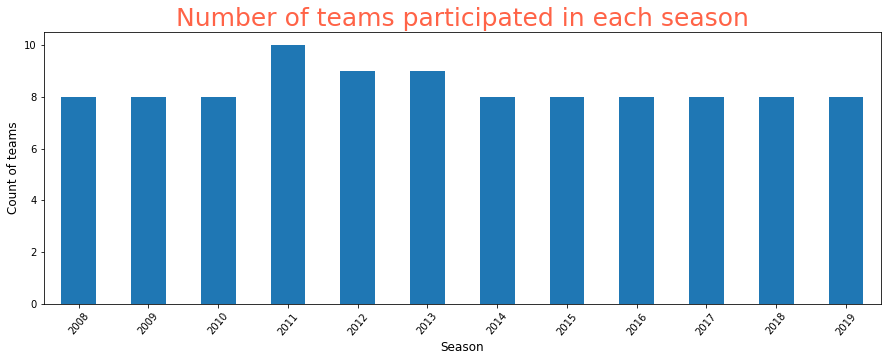

In [90]:
matches_df.groupby('season')['team1'].nunique().plot(kind = 'bar', figsize=(15,5))
plt.title('Number of teams participated in each season', fontdict=style1 )
plt.ylabel("Count of teams", size = 12)
plt.xlabel("Season", size = 12)
plt.xticks(rotation=50, size=10)
plt.xticks(size = 10)
plt.yticks(size = 10)

- 10 teams played in 2011 and 9 teams each in 2012 and 2013

- This explains why 2011-2013 have seen more matches being played than other seasons

### teams total scoring runs, over the years

(array([15000., 16000., 17000., 18000., 19000., 20000., 21000., 22000.]),
 <a list of 8 Text major ticklabel objects>)

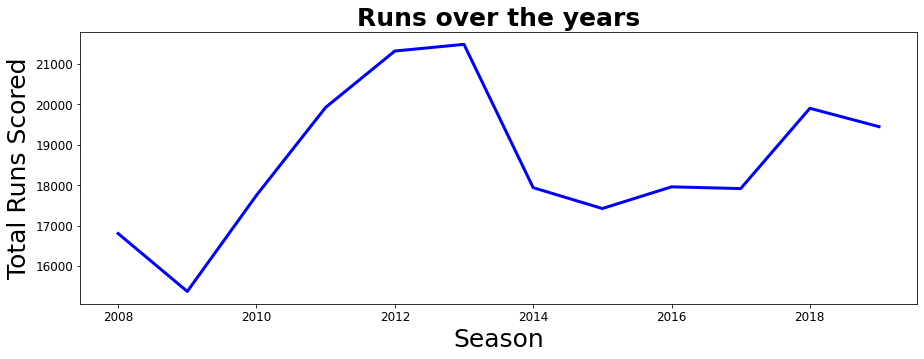

In [174]:
merge.groupby('season')['batsman_runs'].sum().plot(kind = 'line', linewidth = 3, figsize =(15,5),
                                                                                             color = 'blue')
plt.title("Runs over the years",fontsize= 25, fontweight = 'bold')
plt.xlabel("Season", size = 25)
plt.ylabel("Total Runs Scored", size = 25)
plt.xticks(size = 12)
plt.yticks(size = 12)

### top 5 batsmen

In [219]:
# We will print the top 10 leading run scorer in IPL
batsman_score=deliveries_df.groupby('batsman')['batsman_runs'].agg(['sum']).reset_index().sort_values('sum',ascending=False).reset_index(drop=True)
batsman_score=batsman_score.rename(columns={'sum':'batsman_runs'})
print("*** Top 10 Leading Run Scorer in IPL ***")
batsman_score.iloc[:10,:]

*** Top 10 Leading Run Scorer in IPL ***


,batsman,batsman_runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632
5,CH Gayle,4560
6,MS Dhoni,4477
7,RV Uthappa,4446
8,AB de Villiers,4428
9,G Gambhir,4223


Text(0.5, 1.0, 'Top 5 Batsmen')

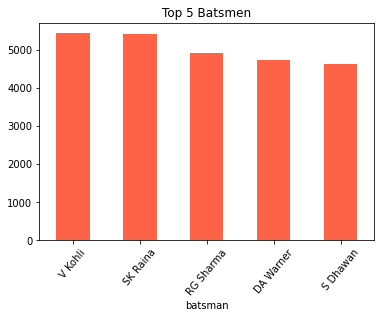

In [220]:
merge.groupby('batsman')['batsman_runs'].agg("sum").sort_values(ascending= False).head().plot(kind='bar', color='Tomato')
plt.xticks(rotation=50, size=10)
plt.title("Top 5 Batsmen")

> Virat Kohli and S.K Raina Scored the most runs, so probability is that in whichever team they are that team has high chances of winning by runs.

### batsmen with the best strike rates over the years

In [221]:
#We will consider players who have played 10 or more seasons
no_of_balls = pd.DataFrame(merge.groupby('batsman')['ball'].count()) #total number of matches played by each batsman
runs = pd.DataFrame(merge.groupby('batsman')['batsman_runs'].sum()) #total runs of each batsman
seasons = pd.DataFrame(merge.groupby('batsman')['season'].nunique()) #season = 1 implies played only 1 season

batsman_strike_rate = pd.DataFrame({'balls':no_of_balls['ball'],'run':runs['batsman_runs'],'season':seasons['season']})
batsman_strike_rate.reset_index(inplace = True)

batsman_strike_rate['strike_rate'] = batsman_strike_rate['run']/batsman_strike_rate['balls']*100
highest_strike_rate = batsman_strike_rate[batsman_strike_rate.season.isin([10,11])][['season','batsman','strike_rate']].sort_values(by = 'strike_rate',
                                                                                                            ascending = False)

highest_strike_rate.head(10)

,season,batsman,strike_rate
92,11,CH Gayle,145.640370
213,10,KA Pollard,141.751527
112,10,DA Warner,139.523249
444,11,SR Watson,136.945813
72,11,BB McCullum,127.332746
449,10,STR Binny,126.000000
118,11,DJ Bravo,125.565801
514,11,Yuvraj Singh,125.283190
53,10,AT Rayudu,124.058187
147,11,G Gambhir,119.835414


(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 <a list of 9 Text major ticklabel objects>)

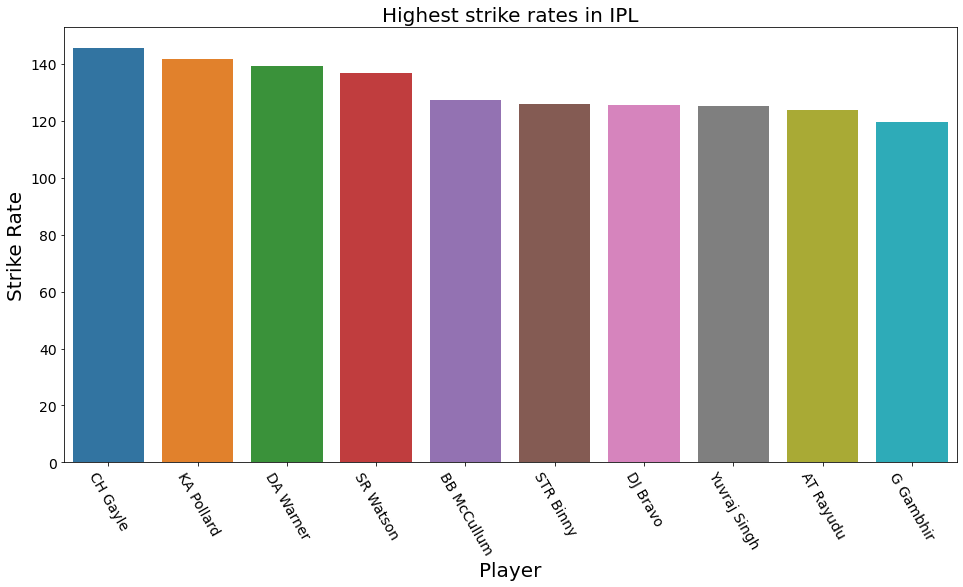

In [222]:
plt.figure(figsize = (16,8))
sns.barplot(x='batsman', y='strike_rate', data = highest_strike_rate.head(10))
plt.title("Highest strike rates in IPL",fontsize= 20)
plt.xlabel("Player", size = 20)
plt.xticks(rotation=-60, size=10)
plt.ylabel("Strike Rate", size = 20)
plt.xticks(size = 14)
plt.yticks(size = 14)

> AB de Villiers, Gayle have the highest strike rates in IPL. They are the big hitters and can win any match on their day
> One surprise here is that Harbhajan Singh who is a bowler has a strike rate of 130+ and comes before Rohit Sharma in ranking

### Top 5 bowlers

In [175]:
wicket_data=deliveries_df.dropna(subset=['dismissal_kind'])
wicket_data=wicket_data[~wicket_data['dismissal_kind'].isin(['run out','retired hurt','obstructing the field'])]
wicket_data.groupby('bowler')['dismissal_kind'].agg(['count']).reset_index().sort_values('count',ascending=False).reset_index(drop=True).iloc[:10,:]

,bowler,count
0,SL Malinga,170
1,A Mishra,156
2,Harbhajan Singh,150
3,PP Chawla,149
4,DJ Bravo,147
5,B Kumar,133
6,R Ashwin,125
7,SP Narine,122
8,UT Yadav,119
9,RA Jadeja,108


Text(0.5, 1.0, 'Top 5 Bowlers')

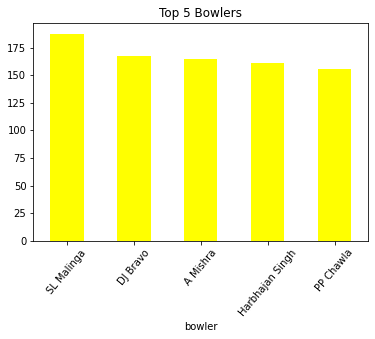

In [176]:
merge.groupby('bowler')['player_dismissed'].count().sort_values(ascending=False).head(5).plot(kind='bar', color='yellow')
plt.xticks(rotation=50, size=10)
plt.title("Top 5 Bowlers")

### bowlers who has bowled most number of balls in IPL

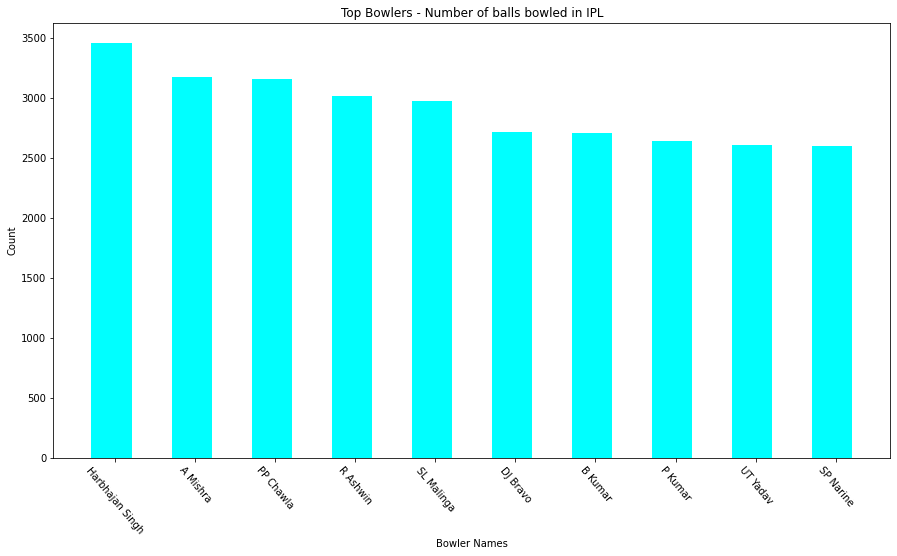

In [177]:
temp_df = deliveries_df.groupby('bowler')['ball'].agg('count').reset_index().sort_values(by='ball', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.5
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['ball']), width=width, color='cyan')
ax.set_xticks(ind+((width)/12.))
ax.set_xticklabels(labels, rotation=-50)
ax.set_ylabel("Count")
ax.set_title("Top Bowlers - Number of balls bowled in IPL")
ax.set_xlabel('Bowler Names')
plt.show()

>**Harbhajan Singh** is the the bowler with most number of balls bowled in IPL matches. Now let us see the bowler with more number of dot balls.

### bowlers who has bowled most number of dot balls in IPL

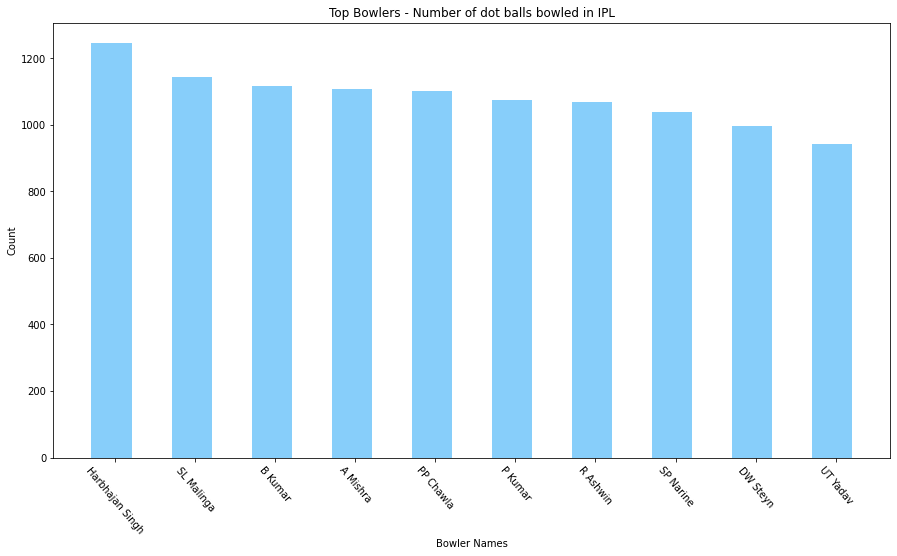

In [178]:
temp_df = deliveries_df.groupby('bowler')['total_runs'].agg(lambda x: (x==0).sum()).reset_index().sort_values(by='total_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.5
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['total_runs']), width=width, color='lightskyblue')
ax.set_xticks(ind+((width)/12.))
ax.set_xticklabels(labels, rotation=-50)
ax.set_ylabel("Count")
ax.set_title("Top Bowlers - Number of dot balls bowled in IPL")
ax.set_xlabel('Bowler Names')
plt.show()

### bowlers who has bowled most number of extras in IPL.

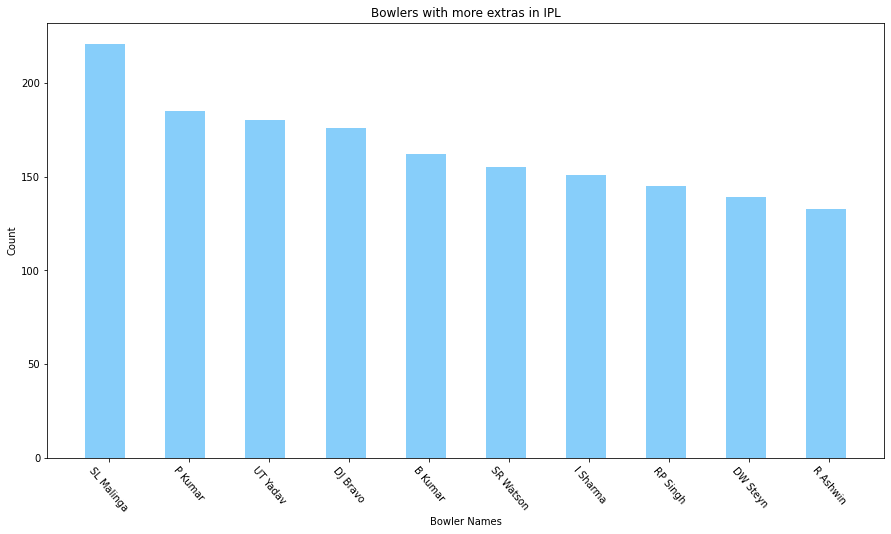

In [223]:
# Now let us see the bowlers who has bowled more number of extras in IPL.
temp_df = deliveries_df.groupby('bowler')['extra_runs'].agg(lambda x: (x>0).sum()).reset_index().sort_values(by='extra_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
        
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['extra_runs']), width=width, color='lightskyblue')
ax.set_xticks(ind+((width)/12.))
ax.set_xticklabels(labels, rotation=-50)
ax.set_ylabel("Count")
ax.set_title("Bowlers with more extras in IPL")
ax.set_xlabel('Bowler Names')
plt.show()

>**Malinga** tops the chart with 221 extra runs followed by **Pravin Kumar.**

### bowlers who have picked up wickets more frequently

In [179]:
#strike_rate = balls bowled by wickets taken
balls_bowled = pd.DataFrame(merge.groupby('bowler')['ball'].count())
wickets_taken = pd.DataFrame(merge[merge['dismissal_kind'] != 'no dismissal'].groupby('bowler')['dismissal_kind'].count())
seasons_played = pd.DataFrame(merge.groupby('bowler')['season'].nunique())
bowler_strike_rate = pd.DataFrame({'balls':balls_bowled['ball'],'wickets':wickets_taken['dismissal_kind'],
                          'season':seasons_played['season']})
bowler_strike_rate.reset_index(inplace = True)

bowler_strike_rate['strike_rate'] = bowler_strike_rate['balls']/bowler_strike_rate['wickets']
def highlight_cols(s):
    color = 'skyblue'
    return 'background-color: %s' % color
#Strike rate for bowlers who have taken more than 50 wickets
best_bowling_strike_rate = bowler_strike_rate[bowler_strike_rate['wickets'] > 50].sort_values(by = 'strike_rate', ascending = True)
best_bowling_strike_rate.head().style.applymap(highlight_cols, subset=pd.IndexSlice[:, ['bowler', 'wickets','strike_rate']])

,bowler,balls,wickets,season,strike_rate
134,Imran Tahir,1249,82,6,15.231707
340,SL Malinga,2974,188,9,15.819149
93,DJ Bravo,2711,168,10,16.136905
9,A Nehra,1974,121,9,16.314050
225,MM Patel,1382,82,7,16.853659


### most common dismissal types in IPL

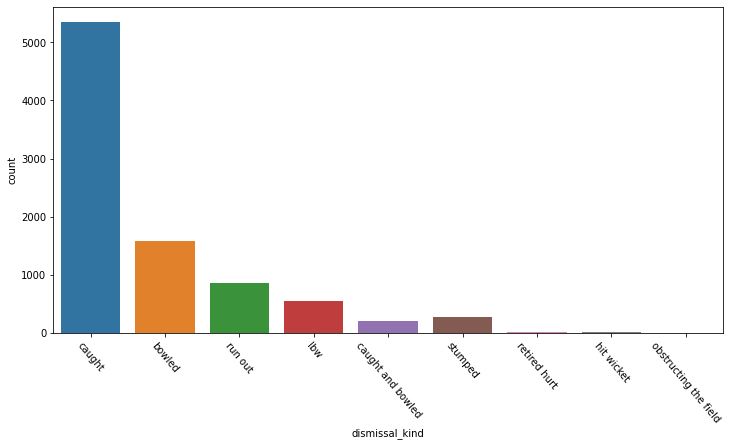

In [180]:
# Now let us see most common dismissal types in IPL.
plt.figure(figsize=(12,6))
sns.countplot(x='dismissal_kind', data=deliveries_df)
plt.xticks(rotation=-50)
plt.show()

>**Caught** is the most common dismissal type in IPL followed by Bowled. There are very few instances of hit wicket as well. **'Obstructing the field'** is one of the dismissal type as well in IPL.!

### number of matches played by each team

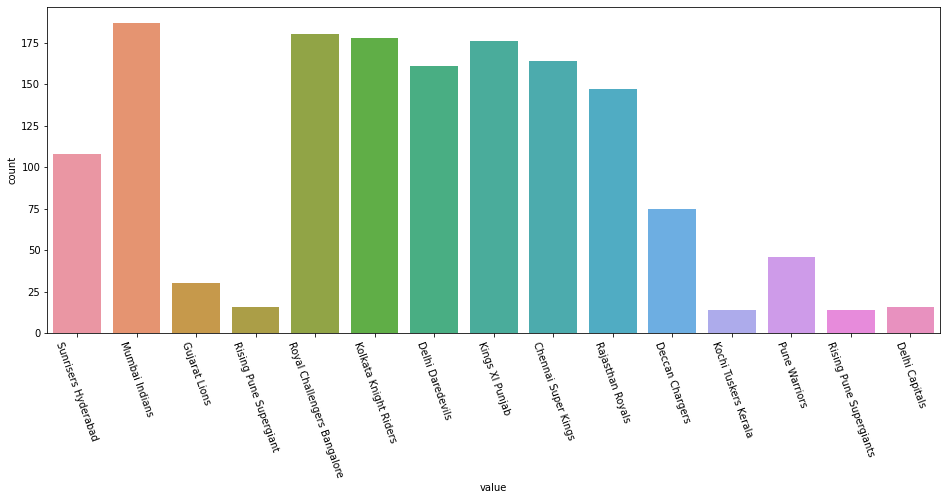

In [181]:
temp_df = pd.melt(matches_df, id_vars=['id','season'], value_vars=['team1', 'team2'])
plt.figure(figsize=(16,6))
sns.countplot(x='value', data=temp_df)
plt.xticks(rotation=-70, size=10)
plt.show()

> **"Mumbai Indians"** lead the pack with most number of matches played followed by **"Royal Challengers Bangalore"**. There are also teams with very few matches like *'Rising Pune Supergiants'*, *'Gujarat Lions'* as they are new teams that came in only last season.

In [182]:
toss_ser = matches_df['toss_winner'].value_counts()

toss_data = pd.DataFrame(columns=["team", "wins"])

for items in toss_ser.iteritems():
    temp_data = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    toss_data = toss_data.append(temp_data, ignore_index=True)
toss_data

,team,wins
0,Mumbai Indians,98
1,Kolkata Knight Riders,92
2,Chennai Super Kings,89
3,Royal Challengers Bangalore,81
4,Kings XI Punjab,81
5,Rajasthan Royals,80
6,Delhi Daredevils,80
7,Sunrisers Hyderabad,46
8,Deccan Chargers,43
9,Pune Warriors,20


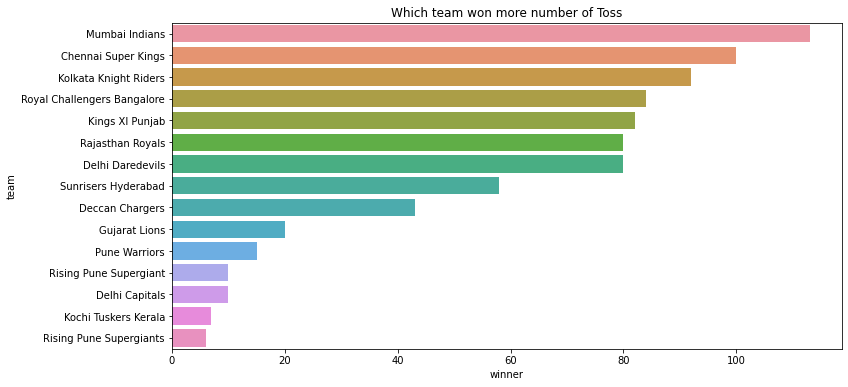

In [183]:
plt.figure(figsize=(12,6))
sns.barplot(x='wins', y='team', data=toss_data, orient='h')
sns.barplot(y = data.index, x = data, orient='h')
plt.title('Which team won more number of Toss')
plt.show()

### top umpires

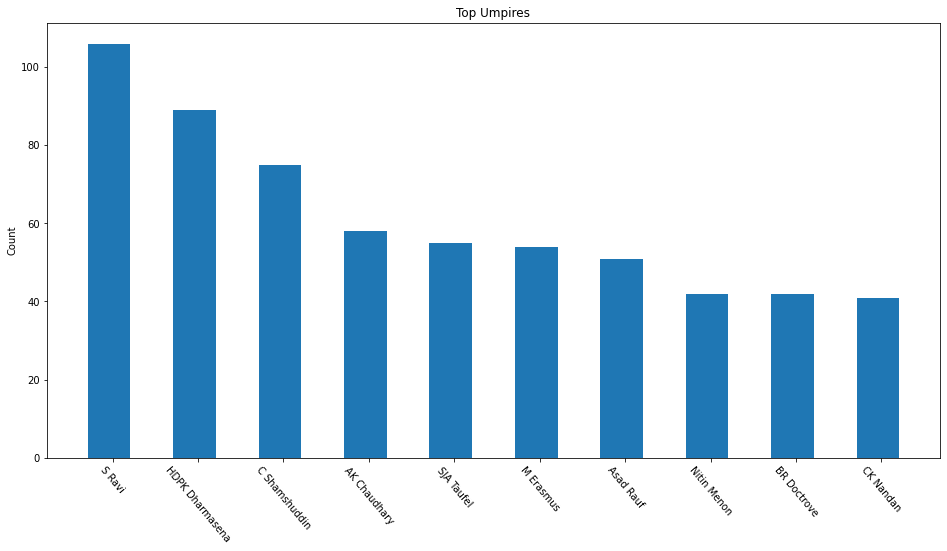

In [184]:
temp_df = pd.melt(matches_df, id_vars=['id'], value_vars=['umpire1', 'umpire2'])
temp_series = temp_df.value.value_counts()[:10]
labels = np.array(temp_series.index)
ind = np.arange(len(labels))
width = 0.5
fig, ax = plt.subplots(figsize=(16,8))
rects = ax.bar(ind, np.array(temp_series), width=width,)
ax.set_xticks(ind+((width)/12.))
ax.set_xticklabels(labels, rotation=-50)
ax.set_ylabel("Count")
ax.set_title("Top Umpires")
plt.show()

> **Dharmasena seems** to be the most sought after umpire for IPL matches followed by Ravi. Others are fairly close to each other.

### match vs wins match for each team

In [107]:
#finding played match vs wins match for each team
team_played_wins = pd.DataFrame((team, matches_df[(matches_df['team1']==team) | (matches_df['team2']==team)].shape[0], matches_df[matches_df['winner']==team].shape[0]) for team in matches_df['team1'].unique())
team_played_wins.columns = ['Team', 'Played_match', 'Wins_match']
team_played_wins = team_played_wins.sort_values(by='Played_match', ascending=False)
team_played_wins

,Team,Played_match,Wins_match
1,Mumbai Indians,187,113
4,Royal Challengers Bangalore,180,84
5,Kolkata Knight Riders,178,92
7,Kings XI Punjab,176,82
8,Chennai Super Kings,164,100
6,Delhi Daredevils,161,67
9,Rajasthan Royals,147,75
0,Sunrisers Hyderabad,108,58
10,Deccan Chargers,75,29
12,Pune Warriors,46,12


In [108]:
#plotting played vs wins for each team
teams = team_played_wins['Team'].tolist()
played = team_played_wins['Played_match'].tolist()
wins = team_played_wins['Wins_match'].tolist()

fig = go.Figure(data=[
    go.Bar(name='Played Match', x=teams, y=played, text=played, textposition='auto'),
    go.Bar(name='Win Match', x=teams, y=wins, text=wins, textposition='auto')
])

fig.update_layout(barmode='stack', title_text='Played Vs Wins | 2008 - 2019')
fig.update_xaxes(tickangle=90)
fig.show()

### finding the factors affecting the victory

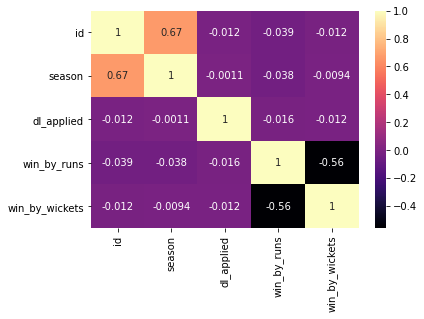

In [185]:
fac = sns.heatmap(matches_df.corr(), annot=True, cmap='magma')

- Since, dl_applied and Season have 0 correlation to winning or loosing we can drop them.

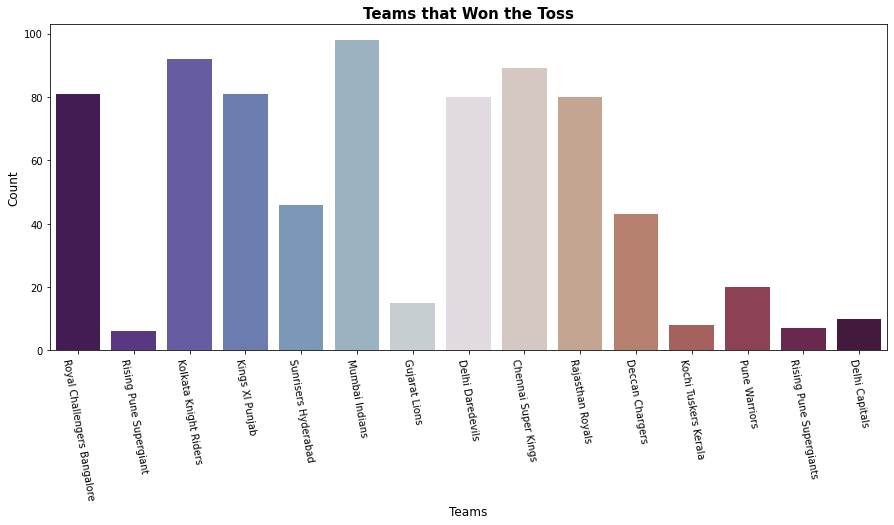

In [186]:
plt.figure(figsize=(15,6))
sns.countplot(matches_df['toss_winner'], data=matches_df, palette='twilight_shifted')
plt.xlabel('Teams', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Teams that Won the Toss', fontweight="bold", size=15)
plt.xticks(rotation=-80, size=10)
plt.yticks(size=10)
plt.show()

In [187]:
print('Team that won most matches by Batting First: ',matches_df.iloc[matches_df[matches_df['win_by_runs'].ge(1)].win_by_runs.idxmax()]['winner'])

Team that won most matches by Batting First:  Mumbai Indians


> Since Mumbai Indians wins the most matches by Batting first and it also wins the Toss we can say that **Winning Toss and Batting first are a factor that affect the victory.** 

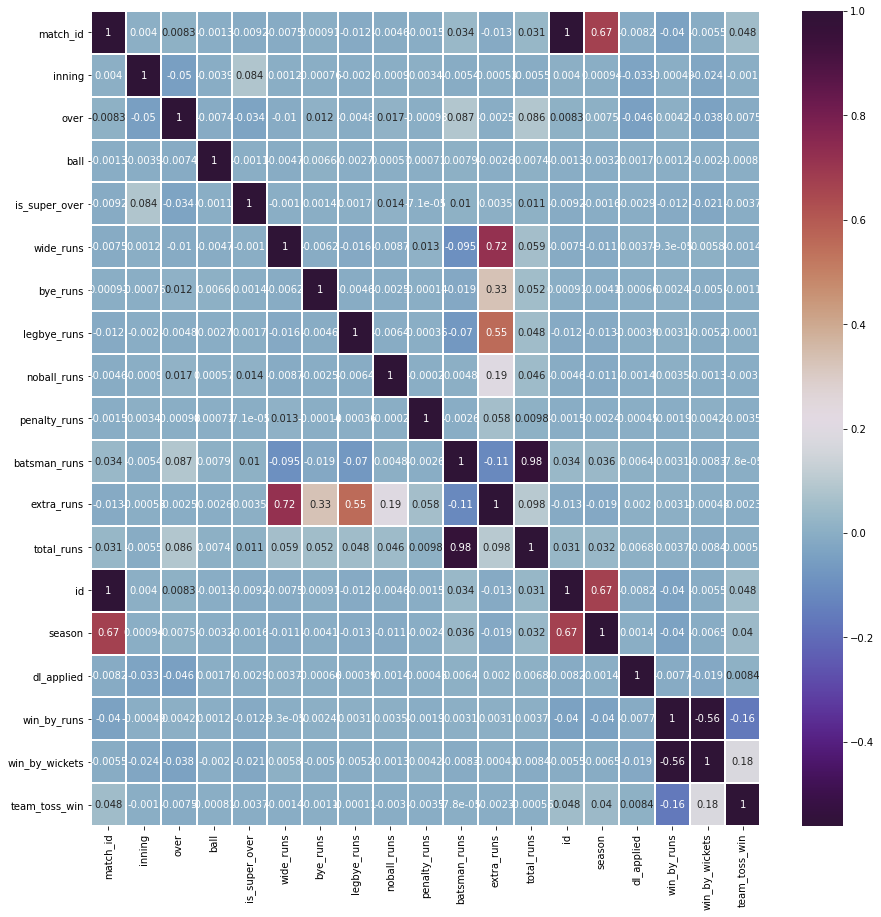

In [188]:
plt.figure(figsize=(15,15))
hm = sns.heatmap(merge.corr(), annot=True, linewidth=1, cmap='twilight_shifted')

### number of matches played in each stadium

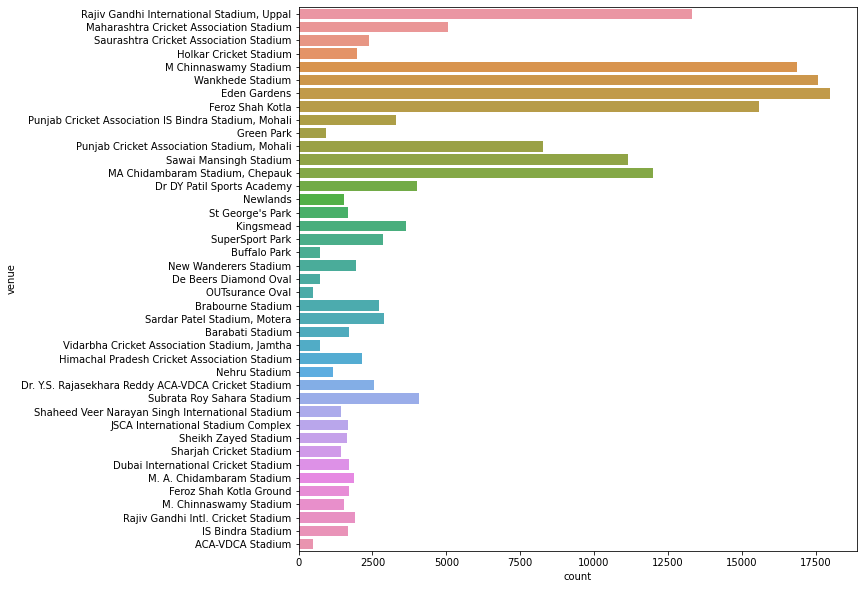

In [189]:
merge.venue.value_counts()
plt.figure(figsize=(10,10))
sns.countplot(data=merge, y='venue')
plt.show()

> There are quite a few venues present in the data with **"M Chinnaswamy Stadium"** being the one with most number of matches followed by **"Eden Gardens"** 

### number of matches hosted in each city

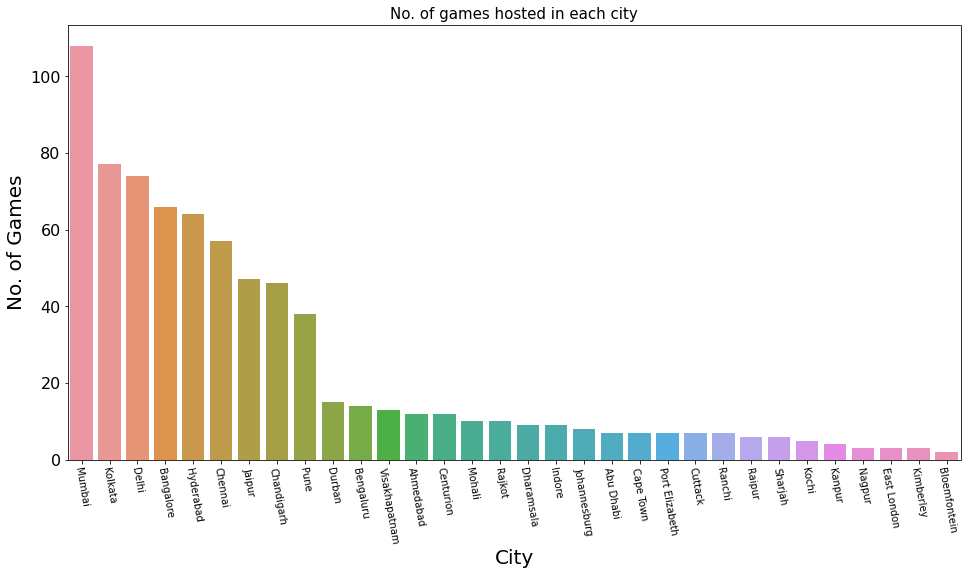

In [114]:
fig=plt.gcf()
fig.set_size_inches(16,8)
sns.countplot(matches_df['city'],order=matches_df['city'].value_counts().index)
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=16)
plt.xlabel('City',fontsize=20)
plt.ylabel('No. of Games',fontsize=20)
plt.title('No. of games hosted in each city',fontsize=15)
count=0 
plt.xticks(rotation=-80, size=10)
cities=pd.DataFrame(matches_df['city'].value_counts())
cities['name'] = matches_df['city'].value_counts().index

### how winning matches by fielding first varies across venues?

Text(0, 0.5, 'Venue')

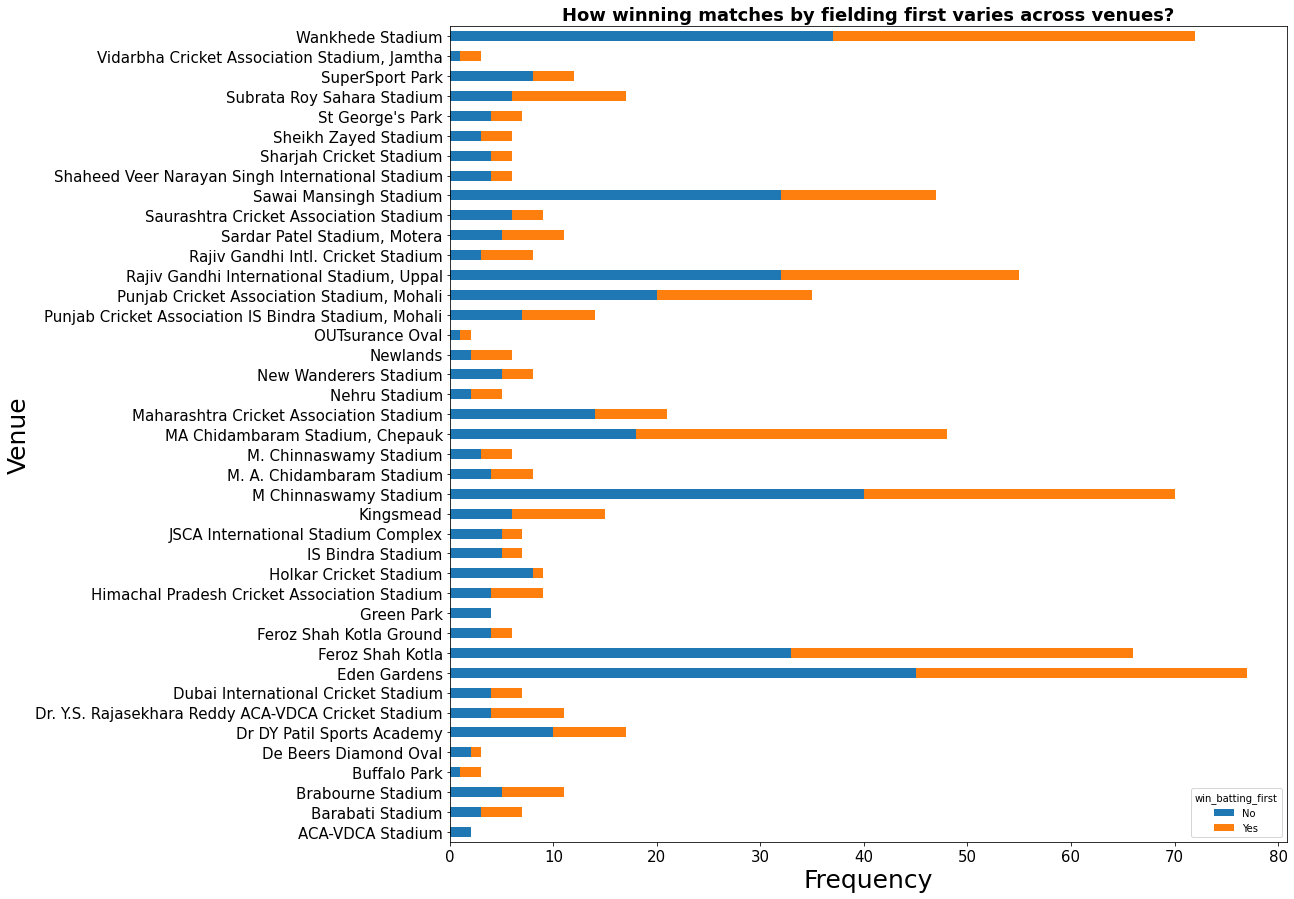

In [190]:
new_matches = matches_df[matches_df['result'] == 'normal']   #taking all those matches where result is normal and creating a new dataframe
new_matches['win_batting_first'] = np.where((new_matches.win_by_runs > 0), 'Yes', 'No')
new_matches.groupby('venue')['win_batting_first'].value_counts().unstack().plot(kind = 'barh', stacked = True,
                                                                               figsize=(15,15))
plt.title("How winning matches by fielding first varies across venues?", fontsize=18,fontweight="bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Frequency", fontsize = 25)
plt.ylabel("Venue", fontsize = 25)

### winning on the bases of first bat or first bowl

In [191]:
matches_df['win_by'] = np.where(matches_df['win_by_runs'] > 0,'Bat first', 'Bowl first')

([<matplotlib.patches.Wedge at 0x7f389094ae50>,
 [Text(-0.18650960840616387, 1.084072952329399, 'Bowl first'),
  Text(0.18650950690792828, -1.0840729697916842, 'Bat first')],
 [Text(-0.10173251367608938, 0.5913125194523995, '55.4%'),
  Text(0.10173245831341542, -0.5913125289772821, '44.6%')])

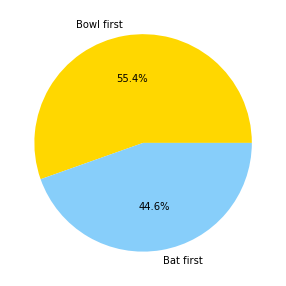

In [192]:
win = matches_df.win_by.value_counts()
x = win.values
labels = win.index
plt.figure(figsize=(5,5))
colors = ['gold', 'lightskyblue']
plt.pie(x , labels = labels, colors=colors, autopct = '%1.1f%%')

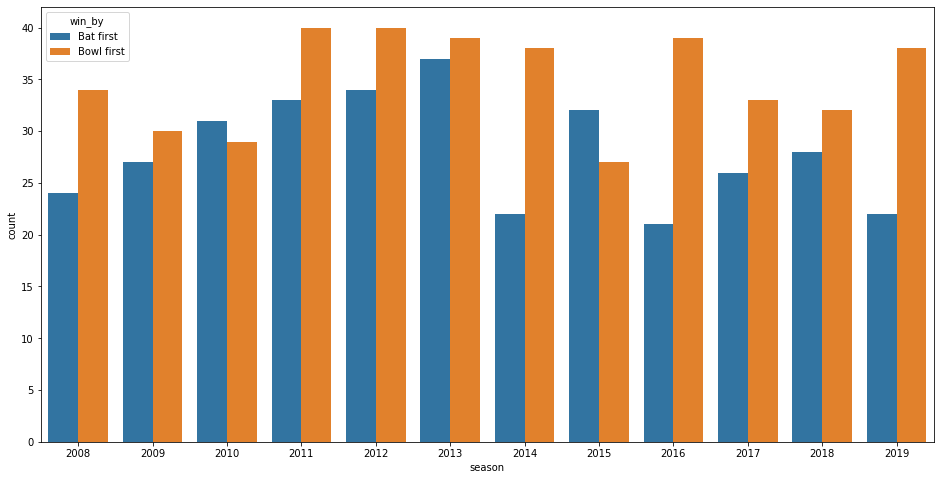

In [193]:
plt.figure(figsize = (16,8))
sns.countplot('season', hue = 'win_by', data = matches_df)

### winning on the bases of toss decision

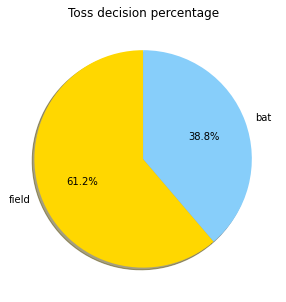

In [194]:
temp_series = matches_df.toss_decision.value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
colors = ['gold', 'lightskyblue']
plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Toss decision percentage")
plt.show()

Text(0.5, 1.0, 'Winning by  Toss Decision')

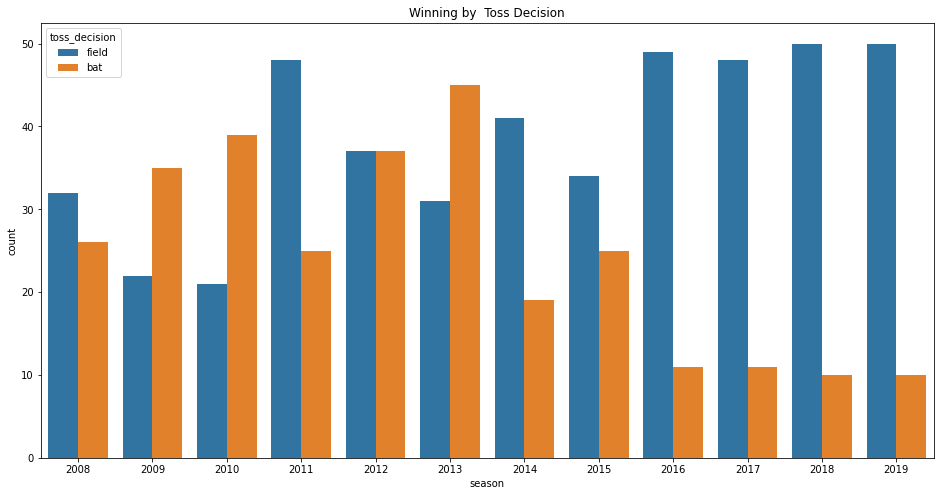

In [195]:
plt.figure(figsize = (16,8))
sns.countplot('season', hue = 'toss_decision', data = matches_df).set_title('Winning by  Toss Decision')

> It seems during the initial years, teams wanted to bat first. Voila.! Look at the **2016 season**, most of the toss decisions are to field first.

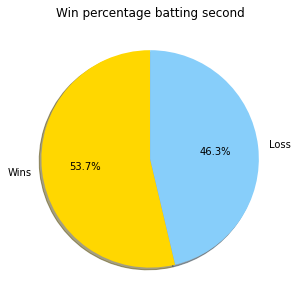

In [196]:
# Since there is a very strong trend towards batting second let us see the win percentage of teams batting second.
num_of_wins = (matches_df.win_by_wickets>0).sum()
num_of_loss = (matches_df.win_by_wickets==0).sum()
labels = ["Wins", "Loss"]
plt.figure(figsize=(5,5))
total = float(num_of_wins + num_of_loss)
sizes = [(num_of_wins/total)*100, (num_of_loss/total)*100]
colors = ['gold', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Win percentage batting second")
plt.show()

> So percentage of times teams batting second has won is **53.2**. Now let us split this by year and see the distribution.

### deciding whether to bat or field after winning the toss

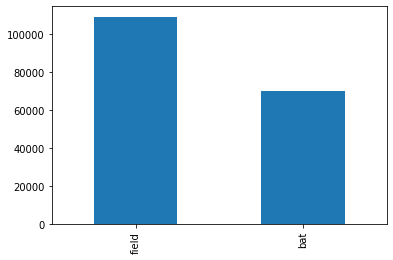

In [197]:
ts = merge.toss_decision.value_counts().plot(kind='bar')
ts

- Teams who win toss choose to field first

### relation between winning toss and victory

Text(0.5, 1.0, 'Toss Wins vs Victory')

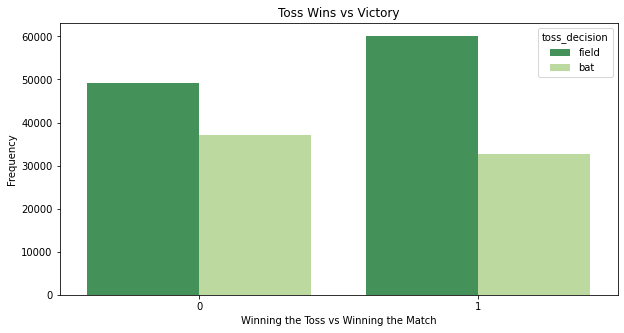

In [198]:
merge['team_toss_win']=np.where((merge.toss_winner==merge.winner),1,0)
plt.figure(figsize=(10,5))
sns.countplot('team_toss_win', data=merge, hue='toss_decision', palette='YlGn_r')
plt.xlabel("Winning the Toss vs Winning the Match")
plt.ylabel("Frequency")
plt.title("Toss Wins vs Victory")

- Teams who choose to field after winning the toss have high chances of winning.

## Conclusion

1. Best Team is Mumbai Indians.
2. Best Player is CH Gayle.
3. Winning Toss and Batting first are a factor that affect the victory.
4. Most matches have been played in Eden Gardens followed by Wankhede Stadium.
5. Teams who win toss choose to field first.
6. Teams who choose to field after winning the toss have high chances of winning.
7. Virat Kohli and S.K Raina Scored the most runs, so probability is that in whichever team they are that team has high chances of winning by runs and comapnies can also hire them to endorse products of batting.
8. Harbhajan Singh and A Mishra took the most wickets, so probability is that in whichever team they are that team has high chances of winning by wickets and comapnies can also hire them to endorse products of bowling.
9. Top Players like, CH Gayle, AB de Villiers, MS Dhoni, and DA Warner can be hired by many companies to endorse their products as they have a huge fanbase.
10. The highest number of match played in IPL season was 2013, 2014, 2015.
11. The highest number of match won by Mumbai Indians i.e 4 match out of 12 matches.
12. Teams which Bowl first has higher chances of winning then the team which bat first.
13. After winning toss more teams decide to do fielding first.
14. In finals teams which decide to do fielding first win the matches more then the team which bat first.
15. In finals most teams after winning toss decide to do fielding first.
16. Top player of match winning are CH gayle, AB de villers.
17. It is interesting that out of 12 IPL finals,9 times the team that won the toss was also the winner of IPL.
18. The highest number of four hit by player is Shikar Dhawan.
19. The highest number of six hit by player is CH gayle.
20. Top leading run scorer in IPL are Virat kholi, SK Raina, RG Sharma.
21. Dismissals in IPL was most by Catch out.
22. The IPL most wicket taken blower is Harbajan Singh.
23. The highest number of matches played by player name are SK Raina, RG Sharma.

- Batsman with more than 300 balls faced in taken and the ones with higher percentage of dot balls are seen. It is interesting to see Ganguly with more than 1000 balls and nearly half of them are dot balls. It is surprising to see names like Jayasuriya and Gibbs in there.!

#### Q1. As a sports analysts, The most successful teams, players & factors contributing win or loss of a team:

- Mumbai Indians is the most successful team in IPL and has won the most number of toss.

- There were more matches won by chasing the total(419 matches) than defending(350 matches).

- When defending a total, the biggest victory was by 146 runs(Mumbai Indians defeated Delhi Daredevils by 146 runs on 06 May 2017 at Feroz Shah Kotla stadium, Delhi).

- When chasing a target, the biggest victory was by 10 wickets(without losing any wickets) and there were 11 such instances.

- The Mumbai city has hosted the most number of IPL matches.

- Chris Gayle has won the maximum number of player of the match title.

- S. Ravi(Sundaram Ravi) has officiated the most number of IPL matches on-field.

- Eden Gardens has hosted the maximum number of IPL matches.

- If a team wins a toss choose to field first as it has highest probablity of winning

#### Q2. Teams or Players a company should endorse for its products.

- If a franchise is looking for a good batsman who has an exceptional record, then they should go for Virat Kohli, Chris Gayle, AB de Villiers, Rohit Sharma, David Warner.
- If a franchise is searching for a good finisher with a good strike rate, then they should go for MS Dhoni, Yusuf Pathan, AB de Villiers.
- If the franchise is looking for a consistant batsman who needs to score good amount of runs then go for V Kohli, S Raina, Rohit Sharma , David Warner...
- If the franchise is looking for a game changing batsman then go for Chris Gayle, AB deVillers, R Sharma , MS Dhoni...
- If the franchise is looking for a batsman who could score good amount of runs every match the go for DA Warner, CH Gayle, V Kohli,AB de Villiers,S Dhawan
- If the franchise needs the best finisher in lower order having good strike rate then go for CH Gayle,KA Pollard, DA Warner,SR Watson,BB McCullum
- If the franchise need a experienced bowler then go for Harbhajan Singh ,A Mishra,PP Chawla ,R Ashwin,SL Malinga,DJ Bravo
- If the franchise need a wicket taking bowler then go for SL Malinga,DJ Bravo,A Mishra ,Harbhajan Singh, PP Chawla
- If the franchise need a bowler bowling most number of dot balls then go for Harbhajan Singh,SL Malinga,B Kumar,A Mishra,PP Chawla
- If the franchise need a bowler with good economy then go for DW Steyn ,M Muralitharan ,R Ashwin,SP Narine ,Harbhajan Singh

### Thank you for patience and taking a look at my project !